In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
table_1_A = pd.read_excel("Table1.xlsx", sheet_name="Fig1 panel a", header=None)
table_1_B = pd.read_excel("Table1.xlsx", sheet_name="Fig1 panel b", header=None)
table_1_C = pd.read_excel("Table1.xlsx", sheet_name="Fig1 panel c", header=None)

In [3]:
table_1_A.columns = table_1_A.iloc[1].values

In [4]:
df = table_1_A.drop([0,1])

In [5]:
df = df.reset_index(drop=True)

In [6]:
df2 = df.copy()

In [8]:
df2 = df[["genus","t=0.4"]]

In [9]:
df2 = df2.assign(thresh=["t=0.4" for str_tt in range(len(df2))])

In [10]:
df2 = df2.rename({"genus":"Genus", "t=0.4":"Number of GCFs", "thresh":"Threshold (T)"}, axis='columns')

In [11]:
newdf = pd.concat([df2,df2,df2,df2])

In [12]:
newdf = newdf.reset_index(drop=True)

In [16]:
for i in range(1,4):
    newdf.loc[i*9:((i+1)*9)-1,["Number of GCFs"]] = df[df.columns[i+1]].values.reshape((-1,1))
    newdf.loc[i*9:((i+1)*9)-1,["Threshold (T)"]] = np.array([df.columns[i+1]]*9).reshape((-1,1))

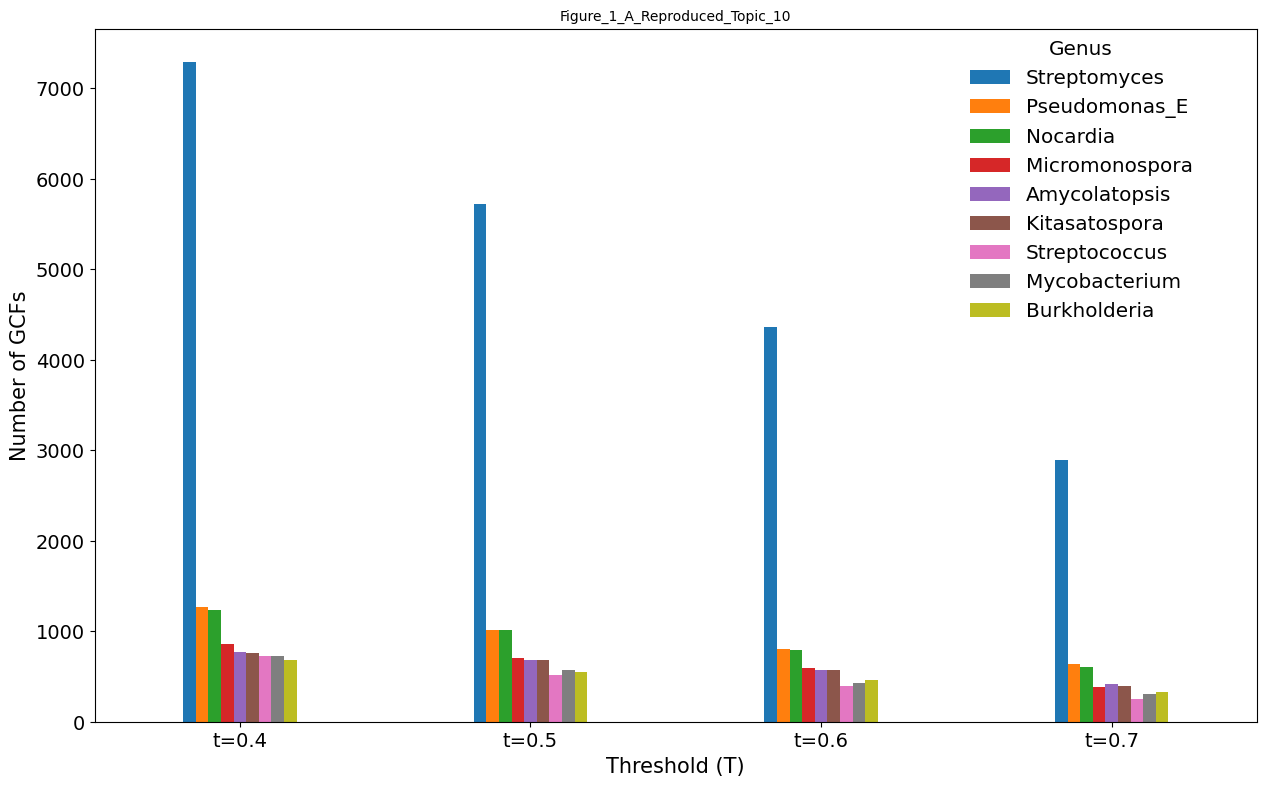

In [91]:
plt.figure(figsize=(15,9), dpi=100)

g = sns.barplot(data=newdf, x="Threshold (T)", y="Number of GCFs", hue="Genus", legend="full",saturation=0.999,width=0.39,);

sns.move_legend(g, "upper right", bbox_to_anchor=(.96, 1.01), frameon=False, fontsize="x-large", title_fontsize="x-large")

g.axes.set_title("Figure_1_A_Reproduced_Topic_10",fontsize=10)
g.set_xlabel("Threshold (T)",fontsize=15)
g.set_ylabel("Number of GCFs",fontsize=15)
g.tick_params(labelsize=14)
plt.show()

g.figure.savefig('Figures_1_Original_Format/output_figure_1_A_Topic_10.png',dpi=1600)

In [4]:
table_1_B.columns = table_1_B.loc[0]

In [9]:
table_1_B = table_1_B.drop(0).reset_index(drop=True)

In [10]:
table_1_B

,label,Number of genomes,method,Number of GCFs,Note
0,NPAtlas chemical classes,-,database search,2487,"column D refers to chemical classes, not GCFs"
1,BiG-SLiCE RefSeq + MAGs,1,interpolated,5.390551,NaN
2,BiG-SLiCE RefSeq + MAGs,219,interpolated,700.712921,NaN
3,BiG-SLiCE RefSeq + MAGs,437,interpolated,1183.117413,NaN
4,BiG-SLiCE RefSeq + MAGs,655,interpolated,1600.357473,NaN
...,...,...,...,...,...
5996,clust-o-matic RefSeq,1468122,extrapolated,72406.694,NaN
5997,clust-o-matic RefSeq,1469433,extrapolated,72407.806,NaN
5998,clust-o-matic RefSeq,1470745,extrapolated,72408.913,NaN
5999,clust-o-matic RefSeq,1472056,extrapolated,72410.014,NaN


In [11]:
table_1_B.label.value_counts()

label
BiG-SLiCE RefSeq + MAGs     2000
BiG-SLiCE RefSeq            2000
clust-o-matic RefSeq        2000
NPAtlas chemical classes       1
Name: count, dtype: int64

In [13]:
table_1_B_metadata = table_1_B[table_1_B.label == "NPAtlas chemical classes"]

In [14]:
table_1_B  = table_1_B.drop(0).drop("Note",axis=1).reset_index(drop=True)

In [16]:
table_1_B.label.value_counts()

label
BiG-SLiCE RefSeq + MAGs    2000
BiG-SLiCE RefSeq           2000
clust-o-matic RefSeq       2000
Name: count, dtype: int64

In [17]:
table_1_B

,label,Number of genomes,method,Number of GCFs
0,BiG-SLiCE RefSeq + MAGs,1,interpolated,5.390551
1,BiG-SLiCE RefSeq + MAGs,219,interpolated,700.712921
2,BiG-SLiCE RefSeq + MAGs,437,interpolated,1183.117413
3,BiG-SLiCE RefSeq + MAGs,655,interpolated,1600.357473
4,BiG-SLiCE RefSeq + MAGs,873,interpolated,1980.036801
...,...,...,...,...
5995,clust-o-matic RefSeq,1468122,extrapolated,72406.694
5996,clust-o-matic RefSeq,1469433,extrapolated,72407.806
5997,clust-o-matic RefSeq,1470745,extrapolated,72408.913
5998,clust-o-matic RefSeq,1472056,extrapolated,72410.014


In [19]:
table_1_B.describe(include="all")

,label,Number of genomes,method,Number of GCFs
count,6000,6000,6000,6000.000000
unique,3,5978,3,6000.000000
top,BiG-SLiCE RefSeq + MAGs,1,extrapolated,5.390551
freq,2000,3,3000,1.000000


In [20]:
table_1_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   label              6000 non-null   object
 1   Number of genomes  6000 non-null   object
 2   method             6000 non-null   object
 3   Number of GCFs     6000 non-null   object
dtypes: object(4)
memory usage: 187.6+ KB


In [22]:
table_1_B

,label,Number of genomes,method,Number of GCFs
0,BiG-SLiCE RefSeq + MAGs,1,interpolated,5.390551
1,BiG-SLiCE RefSeq + MAGs,219,interpolated,700.712921
2,BiG-SLiCE RefSeq + MAGs,437,interpolated,1183.117413
3,BiG-SLiCE RefSeq + MAGs,655,interpolated,1600.357473
4,BiG-SLiCE RefSeq + MAGs,873,interpolated,1980.036801
...,...,...,...,...
5995,clust-o-matic RefSeq,1468122,extrapolated,72406.694
5996,clust-o-matic RefSeq,1469433,extrapolated,72407.806
5997,clust-o-matic RefSeq,1470745,extrapolated,72408.913
5998,clust-o-matic RefSeq,1472056,extrapolated,72410.014


In [149]:
bigslice_mags_data.method.value_counts()

method
extrapolated    1000
interpolated     999
observed           1
Name: count, dtype: int64

In [ ]:
npatlas

In [153]:
npatlas_series

,label,Number of genomes,method,Number of GCFs
0,BiG-SLiCE RefSeq + MAGs,1,interpolated,2487
1,BiG-SLiCE RefSeq + MAGs,219,interpolated,2487
2,BiG-SLiCE RefSeq + MAGs,437,interpolated,2487
3,BiG-SLiCE RefSeq + MAGs,655,interpolated,2487
4,BiG-SLiCE RefSeq + MAGs,873,interpolated,2487
...,...,...,...,...
1995,BiG-SLiCE RefSeq + MAGs,1468340,extrapolated,2487
1996,BiG-SLiCE RefSeq + MAGs,1469597,extrapolated,2487
1997,BiG-SLiCE RefSeq + MAGs,1470854,extrapolated,2487
1998,BiG-SLiCE RefSeq + MAGs,1472111,extrapolated,2487


In [152]:
npatlas_series = bigslice_mags_data
npatlas_series["Number of GCFs"] = npatlas

/var/folders/5c/snsg0_1d4499vnxz9dtgnzl00000gn/T/ipykernel_12732/3818229960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npatlas_series["Number of GCFs"] = npatlas


In [159]:
bigslice_mags_data = table_1_B[table_1_B.label == "BiG-SLiCE RefSeq + MAGs"]
bigslice_refseq_data = table_1_B[table_1_B.label == "BiG-SLiCE RefSeq"]
clustomatic_data = table_1_B[table_1_B.label == "clust-o-matic RefSeq"]

In [165]:
npatlas_series["Number of genomes"] = npatlas

/var/folders/5c/snsg0_1d4499vnxz9dtgnzl00000gn/T/ipykernel_12732/1795640175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npatlas_series["Number of genomes"] = npatlas


In [171]:
npatlas_series["Number of genomes"] = pd.to_numeric(npatlas_series["Number of genomes"])
npatlas_series["Number of GCFs"] = pd.to_numeric(npatlas_series["Number of GCFs"])

/var/folders/5c/snsg0_1d4499vnxz9dtgnzl00000gn/T/ipykernel_12732/2865813608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npatlas_series["Number of genomes"] = pd.to_numeric(npatlas_series["Number of genomes"])
/var/folders/5c/snsg0_1d4499vnxz9dtgnzl00000gn/T/ipykernel_12732/2865813608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npatlas_series["Number of GCFs"] = pd.to_numeric(npatlas_series["Number of GCFs"])


In [172]:
npatlas_series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   label              2000 non-null   object
 1   Number of genomes  2000 non-null   int64 
 2   method             2000 non-null   object
 3   Number of GCFs     2000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 78.1+ KB


In [175]:
npatlas_series["Number of genomes"] = bigslice_mags_data["Number of genomes"]

/var/folders/5c/snsg0_1d4499vnxz9dtgnzl00000gn/T/ipykernel_12732/1087858547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npatlas_series["Number of genomes"] = bigslice_mags_data["Number of genomes"]


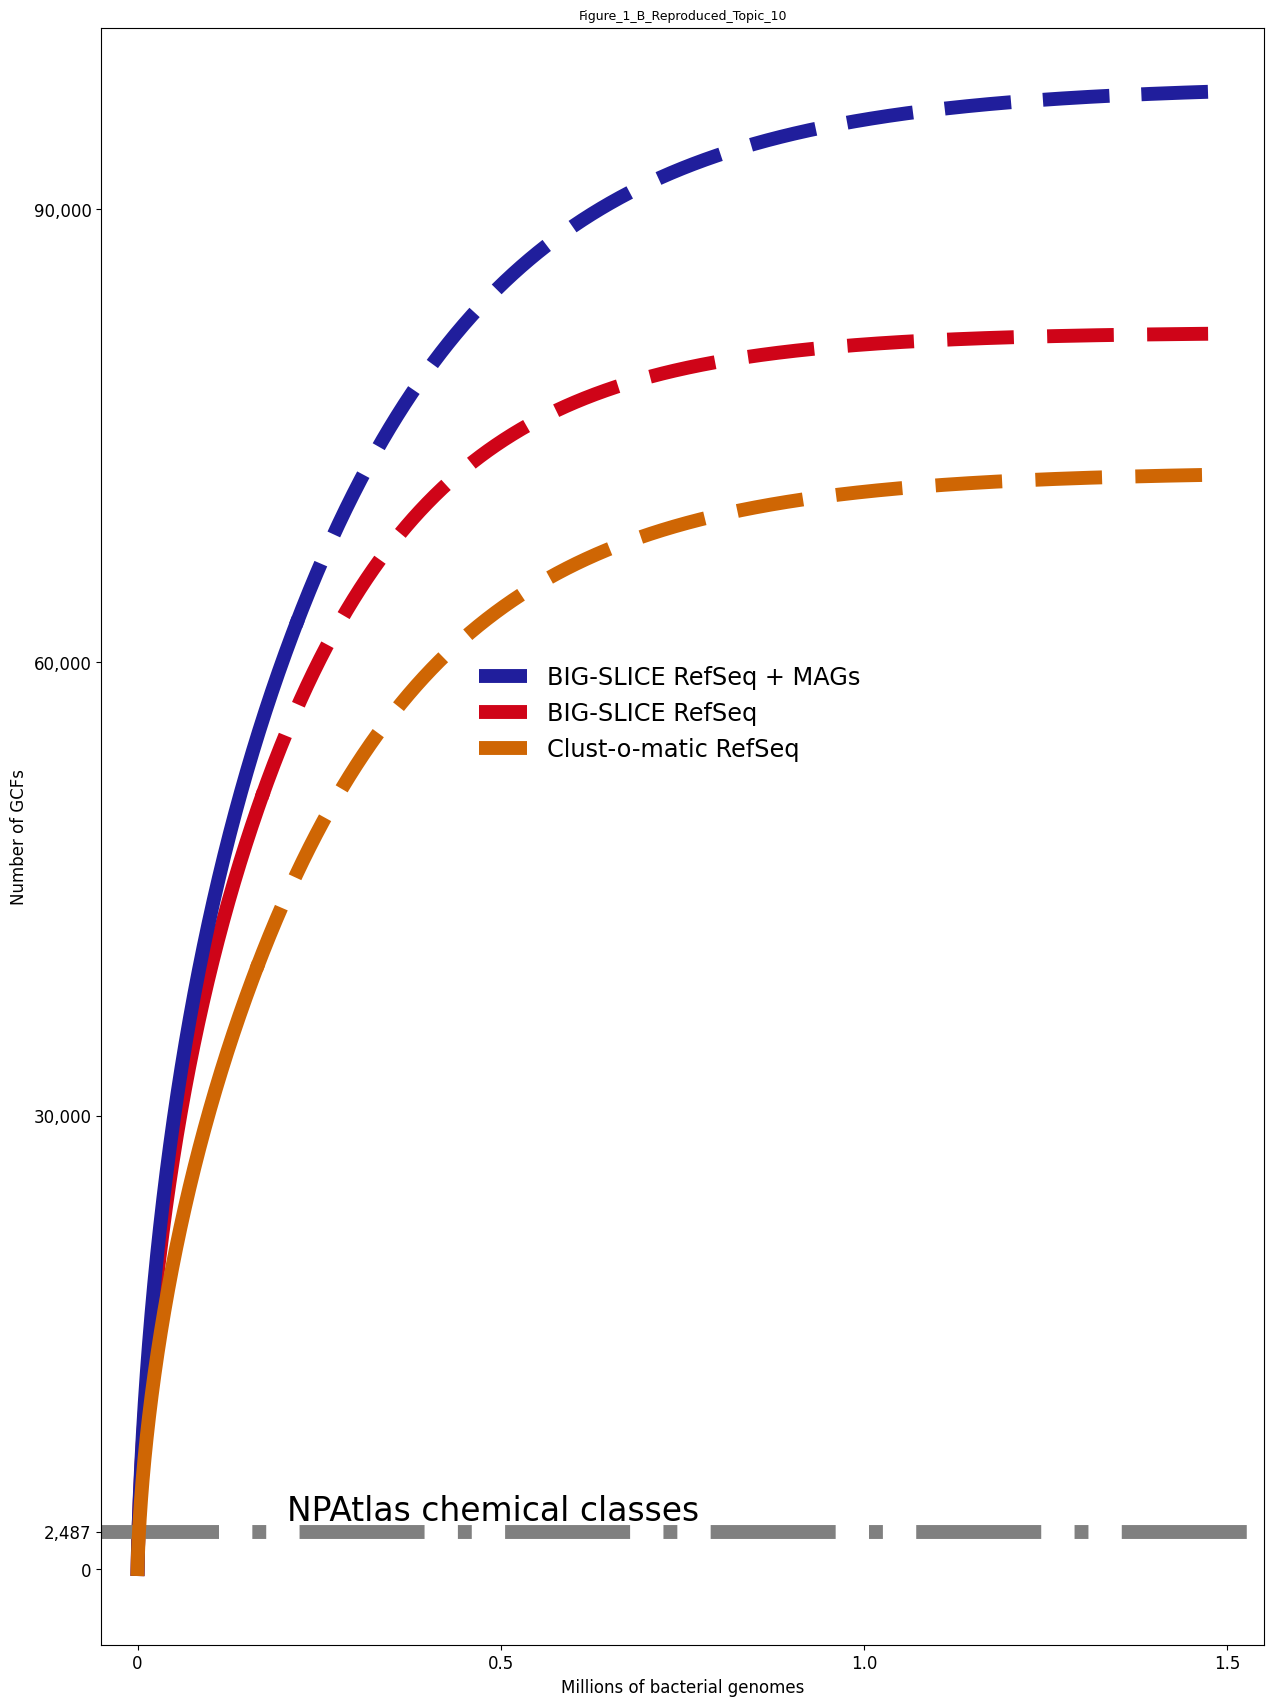

In [295]:
plt.figure(figsize=(15,21), dpi=100)


g3 = sns.lineplot(x=bigslice_mags_data["Number of genomes"][999:]/1000000, 
                  y=bigslice_mags_data["Number of GCFs"][999:], 
                  label="BIG-SLICE RefSeq + MAGs",
                  linestyle=(0, (4.8, 2.3)),
                  lw=10,
                  color="#201e9c")

g4 = sns.lineplot(x=bigslice_refseq_data["Number of genomes"][999:]/1000000,
                  y=bigslice_refseq_data["Number of GCFs"][999:], 
                  label="BIG-SLICE RefSeq",
                  linestyle=(0, (4.8, 2.4)),
                  lw=10,
                  color="#cf0418")


g6 = sns.lineplot(x=clustomatic_data["Number of genomes"][999:]/1000000,
                  y= clustomatic_data["Number of GCFs"][999:], 
                  label="Clust-o-matic RefSeq",
                  linestyle=(0, (4.8, 2.4)),
                  lw=10,
                  color="#cf6604");



g1 = sns.lineplot(x=bigslice_refseq_data["Number of genomes"][:999]/1000000, 
                  y=bigslice_refseq_data["Number of GCFs"][:999], 
                  label=None,
                  lw=10,
                  color="#cf0418")

g0 = sns.lineplot(x=bigslice_mags_data["Number of genomes"][:999]/1000000,
                 y=bigslice_mags_data["Number of GCFs"][:999],
                 label=None,
                 lw=10,
                 color="#201e9c"
                )

g5 = sns.lineplot(x=[-0.06, 1.527],
                  y=2487, 
                  label=None, 
                  linestyle=(0, (9, 2.4, 1, 2.4)),
                  lw=10,
                  color="gray");

g = sns.lineplot(x=clustomatic_data["Number of genomes"][:999]/1000000,
                  y=clustomatic_data["Number of GCFs"][:999], 
                  label=None,
                  lw=10,
                  color="#cf6604")


sns.move_legend(g6, "center", bbox_to_anchor=(.489, .576), frameon=False, fontsize="xx-large")

g.axes.set_title("Figure_1_B_Reproduced_Topic_10", fontsize=9)

g.set_xlabel("Millions of bacterial genomes",fontsize=12)
g.set_ylabel("Number of GCFs",fontsize=12)


g.set_xlim([-0.05, 1.55])
g.set_ylim([-5000, 102000])

g.set_xticks([0, 0.5, 1.0, 1.5])
g.set_yticks([0, 2487, 30000, 60000, 90000])

g.text(0.489, 3887, "NPAtlas chemical classes", ha="center", va="center", fontsize=23.7)

g.set_xticklabels(["0", "0.5", "1.0","1.5"]) 
g.set_yticklabels(["0", "2,487", "30,000","60,000","90,000"]) 

g.tick_params(labelsize=12)

plt.show()

g.figure.savefig('Figures_1_Original_Format/output_figure_1_B_Topic_10.png',dpi=1600)

In [314]:
table_1_C.columns = table_1_C.loc[0]

In [315]:
table_1_C = table_1_C.drop(0).reset_index(drop=True)

In [316]:
table_1_C

,label,Number of GCFs
0,only in RefSeq,40547
1,only in MAGs,11397
2,only in MIBiG,6
3,in RefSeq and MAGs but not in MIBiG,9615
4,in RefSeq and MIBiG but not in MAGs,550
5,in MAGs and MIBiG but not in RefSeq,2
6,in RefSeq and MAGs and MIBiG,340


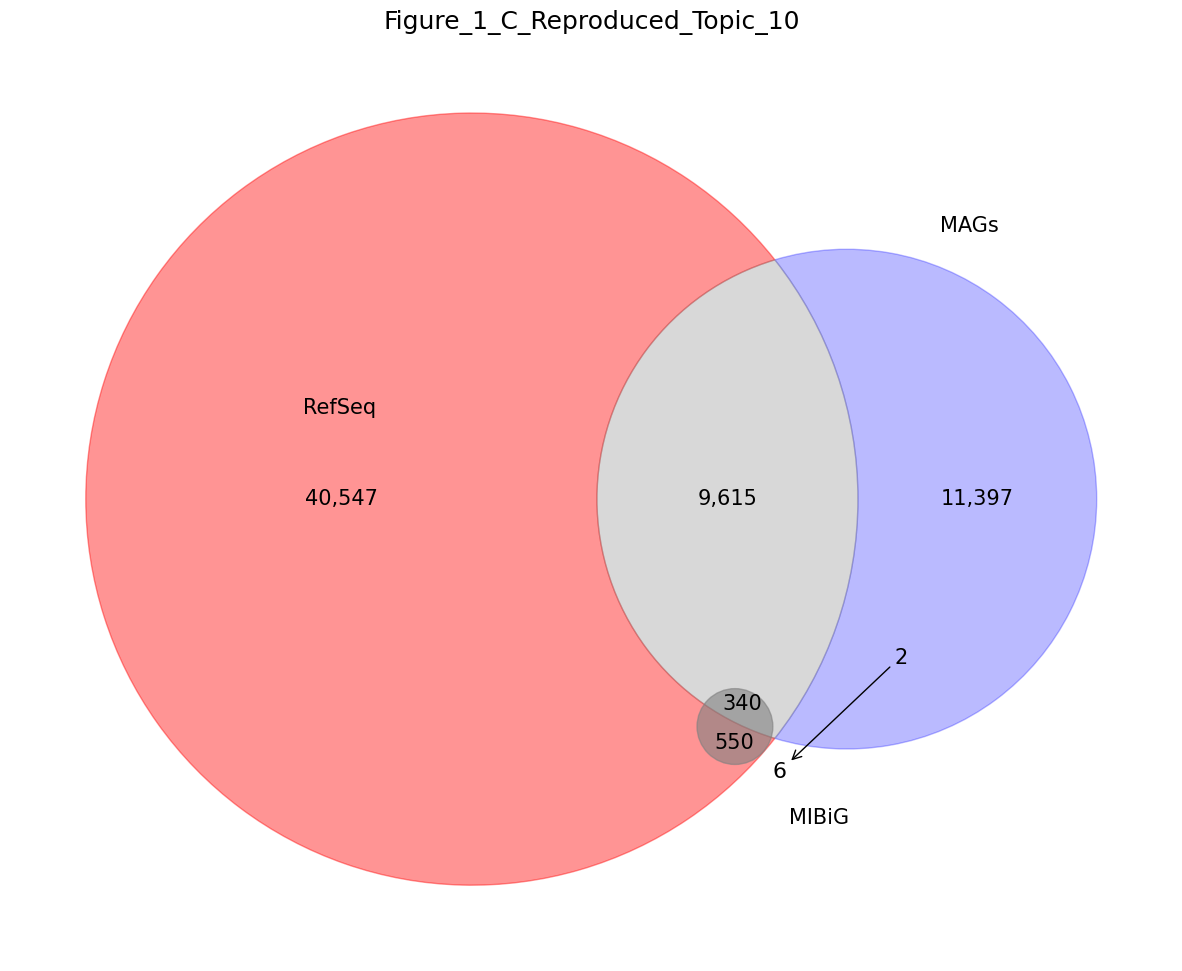

In [195]:
from matplotlib_venn import venn3, venn2
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles

center = (0.201, -0.3)
radius = 0.05

circle = plt.Circle(xy=center, radius=radius, color='gray', fill=True,alpha=0.6)

fig, ax = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(15)


v = venn2(subsets = (40547, 11397, 9615), set_labels = ('A', 'B', 'C'))

plt.text(-0.321, 0.12, "RefSeq", ha="center", va="center", fontsize=15)

v.get_patch_by_id('A').set_alpha(0.42)
v.get_patch_by_id('A').set_color('red')
v.get_label_by_id('A').set_text(None)
v.get_label_by_id('10').set_text('40,547')

v.get_patch_by_id('B').set_alpha(0.27)
v.get_patch_by_id('B').set_color('blue')
v.get_label_by_id('B').set_text(None)
v.get_label_by_id('01').set_text('11,397')

v.get_patch_by_id('C').set_alpha(0.3)
v.get_patch_by_id('C').set_color('gray')
v.get_label_by_id('11').set_text('9,615')

for text in v.subset_labels:
    text.set_fontsize(15)

ax.add_patch(circle)

plt.text(0.2, -0.321, "550", ha="center", va="center", fontsize=15);

plt.text(0.21, -0.27, "340", ha="center", va="center", fontsize=15)

plt.text(0.42, -0.21, "2", ha="center", va="center", fontsize=15);

plt.text(0.51, 0.36, "MAGs", ha="center", va="center", fontsize=15)

plt.text(0.312, -0.42, "MIBiG", ha="center", va="center", fontsize=15)

plt.title("Figure_1_C_Reproduced_Topic_10", fontsize=18)

plt.annotate('6', xy=(0.408, -0.219), xytext=(-81,-81),
             ha='center', textcoords='offset points',
             arrowprops=dict(arrowstyle='<-'),fontsize=15.9);

fig.savefig('Figures_1_Original_Format/output_figure_1_C_Topic_10.png',dpi=1600)